In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
import numpy as np
import copy
# import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d 
import math
import anyterrain as at
import time
import aStarLocal
import aStarGlobal
from mayavi import mlab
from IPython.display import Image
mlab.init_notebook(backend='png')

Notebook initialized with png backend.


In [2]:

# mlab.test_plot3d()

In [3]:
terrain = at.Terrain(0)


### One leg planner always work with fast speed


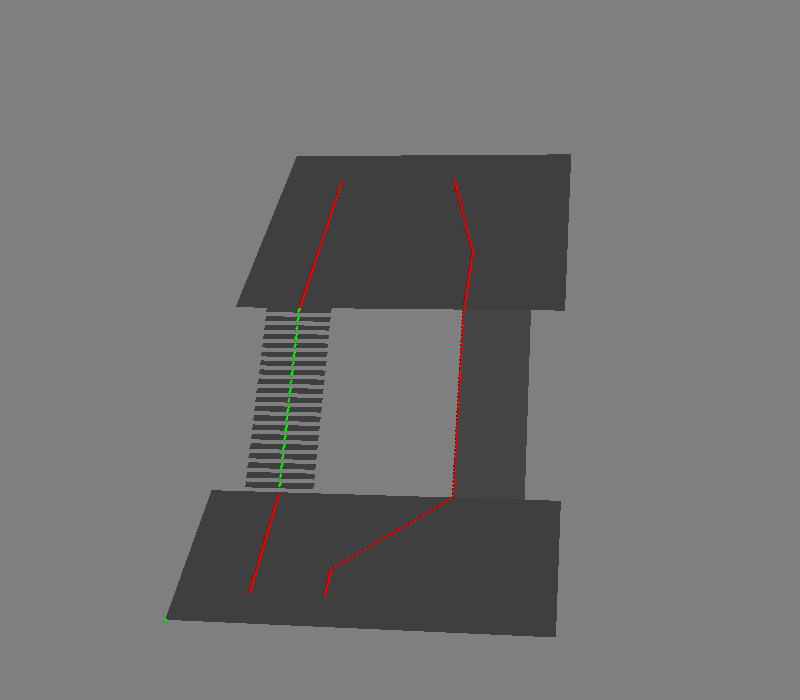

In [4]:
start = (4.0,1.0)
goal = (6.,18.)
anyAStarGlobal = aStarGlobal.AnymalAStarGlobal(start,goal,terrain)

anyAStarGlobal.run()



start = (2.0,1.0)
goal = (2.0,18.0)
anyAStarGlobal1 = aStarGlobal.AnymalAStarGlobal(start,goal,terrain)
anyAStarGlobal1.run()


fig = mlab.figure(1,size=(800, 700))
anyAStarGlobal.plotOptimalPath(fig)
anyAStarGlobal1.plotOptimalPath(fig)
terrain.plotPlanes(fig)

mlab.view(azimuth=-80.0,roll = -12.0)
display(fig)

### Four-leg planner works in most cases but in some special cases, the four-leg planner gets stuck

A* stucks and failed!



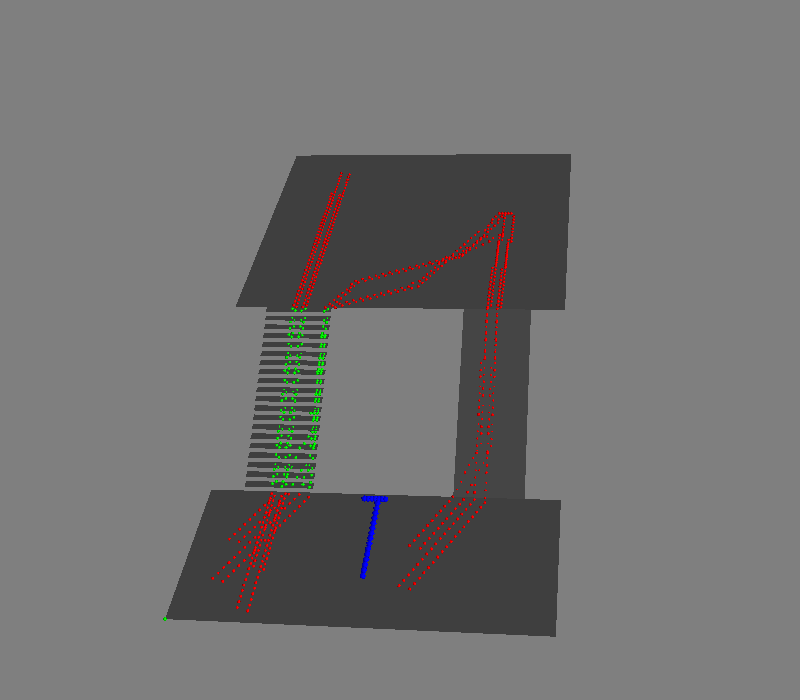

In [5]:
start = (2.0,1.0,3.14/2)
goal = (2,18,3.14/2)
anyAStarLocal = aStarLocal.AnymalAStarLocal(start,goal,terrain)
isAstarSuccess = anyAStarLocal.run()

start = (1.0,2.0,3.14/2)
goal = (8,15.0,3.14/2)
anyAStarLocal1 = aStarLocal.AnymalAStarLocal(start,goal,terrain)
isAstarSuccess = anyAStarLocal1.run()

start = (6.0,2.0,3.14/2)
goal = (8,15.0,3.14/2)
anyAStarLocal2 = aStarLocal.AnymalAStarLocal(start,goal,terrain)
isAstarSuccess = anyAStarLocal2.run()

start = (5.0,1.0,3.14/2)
goal = (5,18,3.14/2)
anyAStarLocal3 = aStarLocal.AnymalAStarLocal(start,goal,terrain)
isAstarSuccess = anyAStarLocal3.run()

fig = mlab.figure(2,size=(800, 700))
terrain.plotPlanes(fig)
anyAStarLocal.plotOptimalPath(fig)
anyAStarLocal1.plotOptimalPath(fig)
anyAStarLocal2.plotOptimalPath(fig)
anyAStarLocal3.plotSearchProgress(fig)

mlab.view(azimuth=-80.0,roll = -12.0)
display(fig)


### So we have a cascaded A* method. One Leg A* is usd to set local target for four legs A*


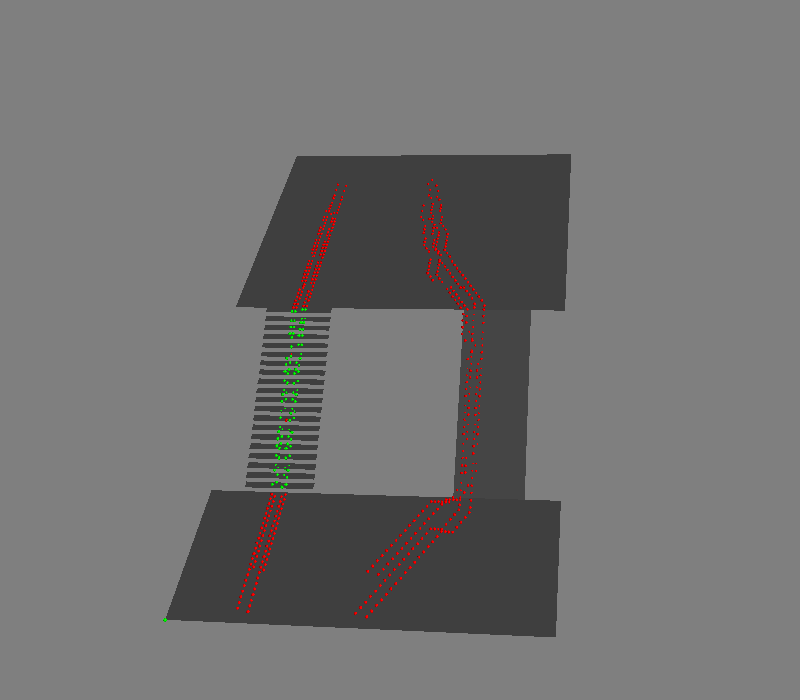

In [6]:
startGlobal = (5.0,1.0)
goalGlobal = (5.0,18.0)
startLocal = (startGlobal[0],startGlobal[1],3.14/2)

flagArrivedTheGoal = False

terrain = at.Terrain(0)
fig = mlab.figure(4,size=(800, 700))
terrain.plotPlanes(fig)

counter = 0

while True:
    globalPlanner = aStarGlobal.AnymalAStarGlobal(startGlobal,goalGlobal,terrain)
    globalPlanner.run()
    optimalPath, localTarget = globalPlanner.getOptimalPath(0.7)
    refinedLocalTarget = globalPlanner.refineTarget(localTarget)
    
    localTarget = (refinedLocalTarget[0],refinedLocalTarget[1],3.14/2)
    
#     print("localTarget =",localTarget,"startLocal = ",startLocal)
    
    localPlanner = aStarLocal.AnymalAStarLocal(startLocal,localTarget,terrain)
    localPlanner.run()
    localPlanner.plotOptimalPath(fig)
    
    startGlobal = (localTarget[0],localTarget[1])
    startLocal = localTarget
    
    counter = counter + 1
    if counter == 10:
        break
        

startGlobal = (2.0,1.0)
goalGlobal = (2.0,18.0)
startLocal = (startGlobal[0],startGlobal[1],3.14/2)
counter = 0

while True:
    globalPlanner = aStarGlobal.AnymalAStarGlobal(startGlobal,goalGlobal,terrain)
    globalPlanner.run()
    optimalPath, localTarget = globalPlanner.getOptimalPath(0.7)
    refinedLocalTarget = globalPlanner.refineTarget(localTarget)
    
    localTarget = (refinedLocalTarget[0],refinedLocalTarget[1],3.14/2)
    
#     print("localTarget =",localTarget,"startLocal = ",startLocal)
    
    localPlanner = aStarLocal.AnymalAStarLocal(startLocal,localTarget,terrain)
    localPlanner.run()
    localPlanner.plotOptimalPath(fig)
    
    startGlobal = (localTarget[0],localTarget[1])
    startLocal = localTarget
    
    counter = counter + 1
    if counter == 10:
        break
        
mlab.view(azimuth=-80.0,roll = -12.0)
display(fig)